# Has Quarantine Changed Our Queues?
Understanding the impact of COVID-19 Quarantine on our Spotify streaming <br>
Kaela Olsen and Anders Jensen <br>
INFO 2950: Introduction to Data Science, Spring 2020 <br>
Final Project due May 18th, 2020 <br><br>
**Last updated: Friday 05.15.20 11:45pm**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

<font color='deeppink'><h1> THINGS TO DO SATURDAY: </h1></font>
<font color='pink'>
- continue doing the side by side comparisons by creating more bar charts
- maybe doing more stuff to compare the two datasets?? if possible??
- we have scatterplots for quarantine data but not the 2019 data
- write the transitions
- write the explanations/discussions
- neaten up the code through functions
- try to do binomial distribution stuff?
</font>

<font color='navy'><h2>SUNDAY: </h2></font>
<font color='cornflowerblue'>
- add more writing
- proofread writing
- make sure our "argument" flows well
- go through campuswire to see if they give more info about expectations
</font>

<font color='indigo'><h2>MONDAY: </h2></font>
<font color='mediumpurple'>
- add intro/conclusion
- add data description
- proofread everything
</font>

## Understanding our Quarantine Tracks

In [2]:
tracks = pd.read_csv("tracks_list.csv")

In [3]:
tracks.sort_values(by=['count'], ascending=False)[:20]

Unnamed: 0                                   uri  count  \
119          221  spotify:track:127QTOFJsJQp5LbJbu3A1y    176   
146          259  spotify:track:1Cv1YLb4q0RzL6pybtaMLo    172   
1002        2564  spotify:track:7eJMfftS33KTjuF7lTsMCx    155   
116          218  spotify:track:6WrI0LAC5M1Rw2MnX2ZvEg    151   
1006        2569  spotify:track:0nbXyq5TXYPCO7pr3N8S4I    147   
1753        6284  spotify:track:0VjIjW4GlUZAMYd2vXMi3b    139   
118          220  spotify:track:0sf12qNH5qcw8qpgymFOqD    136   
144          257  spotify:track:3Dv1eDb0MEgF93GpLXlucZ    133   
846         1723  spotify:track:6K4t31amVTZDgR3sKmwUJJ    132   
433          809  spotify:track:4nK5YrxbMGZstTLbvj6Gxw    130   
0              0  spotify:track:6I9VzXrHxO9rA9A5euc8Ak    120   
470          872  spotify:track:24Yi9hE78yPEbZ4kxyoXAI    116   
2172        7930  spotify:track:6wJYhPfqk3KGhHRG76WzOh    115   
2              3  spotify:track:2xLMifQCjDGFmkHkpNLD9h    111   
1008        2571  spotify:track:5yY9lUy8nbvjM1Uyo1Uqoc    110   
3166       11308  spotify:track:0GO8y8jQk1PkHzS31d699N    106   
296          550  spotify:track:7aiClxsDWFRQ0Kzk5KI5ku    105   
569         1061  spotify:track:55CHeLEfn5iJ0IIkgaa4si    101   
39            63  spotify:track:1B75hgRqe7A4fwee3g3Wmu     96   
1199        3234  spotify:track:5hVghJ4KaYES3BFUATCYn0     95   

                                                   name release_date  \
119                                        Toosie Slide   2020-04-03   
146                                         Sunday Best   2019-01-06   
1002  death bed (coffee for your head) (feat. beabad...   2020-02-08   
116                                     Don't Start Now   2019-10-31   
1006                                            The Box   2019-12-06   
1753                                    Blinding Lights   2020-03-20   
118                                     Blinding Lights   2019-11-29   
144                                              Say So   2019-11-07   
846                          The Less I Know The Better   2015-07-17   
433                                          Supalonely   2019-11-15   
0                                                 Toxic   2003-11-13   
470                               Roses - Imanbek Remix   2019-10-09   
2172                                    Blueberry Faygo   2020-02-07   
2                                            SICKO MODE   2018-08-03   
1008                         Life Is Good (feat. Drake)   2020-01-10   
3166                                        Tongue Tied   2011-09-02   
296                                     hot girl bummer   2019-08-23   
569                                              Savage   2020-03-06   
39                                   U Can't Touch This   1990-02-20   
1199                                          EARFQUAKE   2019-05-17   

      popularity  explicit  danceability  energy  key  ...  instrumentalness  \
119           99      True         0.834   0.454    1  ...          0.000006   
146           96     False         0.878   0.525    5  ...          0.000000   
1002          99     False         0.726   0.431    8  ...          0.000000   
116           97     False         0.794   0.793   11  ...          0.000000   
1006          99      True         0.896   0.586   10  ...          0.000000   
1753         100     False         0.514   0.730    1  ...          0.000095   
118           93     False         0.513   0.796    1  ...          0.000209   
144           97      True         0.787   0.673   11  ...          0.000004   
846           86      True         0.640   0.740    4  ...          0.006780   
433           95      True         0.863   0.631    7  ...          0.000030   
0             80     False         0.774   0.838    5  ...          0.025000   
470           98      True         0.770   0.724    8  ...          0.010700   
2172          95      True         0.774   0.554    0  ...          0.000000   
2      

As you can see, the top five songs of quarantine are 'Toosie Slide' by Drake, 'Sunday Best' by Surfaces, 'death bed' by Powfu and beabadoobee, 'Don't Start Now' by Dua Lipa, and 'The Box' by Roddy Rich. These five songs are all on the US Top 50 tracks charts list as of May 11th, 2020. It seems like the top songs of quarantine have more to do with what songs are trending and less to do with the emotional, physical, and mental circumstances of quarantine.
<br>
<br>
We wonder if this stays true for the rest of the songs, aside from the top 5 songs. Are the songs of quarantine just the songs of the time period of quarantine, or the songs of our emotional state in quarantine? Let's see what the top 20 look like.

On May 11th, the only songs in the top 20 of our data set that weren't on the US Top 50 list were "Toxic", 'Tongue Tied' and 'U Can't Touch This'. However, every other song was on the US Top 50 list. It is interesting to note the disproportional popularity of "Toxic" and "U Can't Touch This." Both songs are very fitting for the Coronavirus pandemic, and the enforced social distancing and self-quarantine because of it.

In [127]:
def summary_stats(dataset):

    rows = []
    features = ['energy', 'danceability', 'valence', 'acousticness', 'speechiness', 'popularity', 'tempo'] 
    stats = ['mean', 'median', 'var' , 'std']

    for feat in features:
        feature = dataset[feat]
        mean = round(feature.mean(),4)
        median = round(feature.median(),4)
        var = round(feature.var(), 4)
        std = round(feature.std(),4)
        rows.append([mean, median, var, std])

    df = pd.DataFrame(rows, columns=stats)
    for x in range(len(features)):
        df = df.rename({x: features[x]})
    return df

In [129]:
print("Quarantine Tracks")
summary_stats(tracks)

Quarantine Tracks


mean    median       var      std
energy          0.6376    0.6560    0.0359   0.1894
danceability    0.6566    0.6710    0.0232   0.1523
valence         0.5278    0.5290    0.0548   0.2340
acousticness    0.2236    0.1130    0.0655   0.2560
speechiness     0.1059    0.0576    0.0113   0.1065
popularity     66.0586   68.0000  197.7553  14.0625
tempo         120.2803  119.5345  781.2709  27.9512

### Quarantine Tracks: Solo Data Analysis

So now, we want to know if the music we listen to during quarantine, or the songs we consider "quarantine songs" according to the playlists we make for them, are selected more as a result of their popularity or of actual quarantine. Thankfully, Spotify gives us a metric to measure popularity.

So to answer this question, we will see if there is a correlation between a track's popularity level, and the number of times they appear in a quarantine playlist.

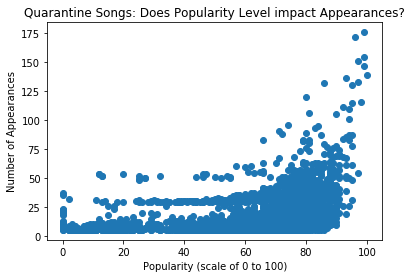

In [6]:
plt.scatter(tracks['popularity'], tracks['count'])
plt.xlabel("Popularity (scale of 0 to 100)")
plt.ylabel("Number of Appearances")
plt.title("Quarantine Songs: Does Popularity Level impact Appearances?")
plt.show()

There seems to be a clear positive relationship with these two variables. However, it doesn't seem exactly linear. We are interested in understanding the strength of correlation between these two variables. We'll use a variant called rank correlation, where each element of a vector has a rank.  

Rank correlation (or Spearman correlation) is very similar to regular correlation (also called Pearson correlation), but it is more robust to relationships that aren't linear. Pearson correlation is to rank correlation as mean is to median. In both cases we can replace the actual value in an array with its *rank* in the array. The median is the value that has the mean rank (ie the midpoint), while the rank correlation is the Pearson correlation between the rank of $X_i$ and the rank of $Y_i$.

The following code defines datapoints that nearly lie on a line and calculates the slope of a regression line fit to the data.

In [7]:
linear_model = LinearRegression().fit(tracks[['popularity']], tracks[['count']])
print("Linear model slope:", round(float(linear_model.coef_[0]),4))

Linear model slope: 0.2205


Now let's see the correlation of:
1. the track counts and the track popularity
2. the *ranks* of the track counts and the *ranks* of the tracks popularity

In [8]:
def corr_compare(x, y):
    corrcoef = np.corrcoef(x, y)[0][1]
    print('Correlation:', round(corrcoef, 4))
    
    rank_corrcoef = np.corrcoef(x.rank(), y.rank())[0][1]
    print('Correlation of ranks:', round(rank_corrcoef,4))
    
    spearman_r = spearmanr(x, y)
    print('Spearman r: {:.4f}'.format(spearman_r.correlation))

In [9]:
print("Comparing Correlations for Popularity and Appearances")
corr_compare(tracks['popularity'], tracks['count'])

Comparing Correlations for Popularity and Appearances
Correlation: 0.2644
Correlation of ranks: 0.4717
Spearman r: 0.4717


As we can see, the correlation of ranks is much higher than the linear correlation.

It would be useful to understand the overall appearances of each song. We can use basic stats to help us understand this.

In [10]:
tracks['count'].describe()

count    8944.000000
mean       11.926431
std        11.723794
min         5.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       176.000000
Name: count, dtype: float64

The most appearances a song has is 176, and the least, a minimum imposed by our datascraping filter, is 5. The average number of playlist appearances was 11.9, with a standard deviation of 11.7. 25% of the songs fell below 6 appearances, 50% fell below 8 appearances, and 75% fell below 13 appearances. This means the appearances are skewed extremely left, and that the top 25% songs are spread between 13 appearances and 176 appearances.

Let's use a histogram to visualize this.

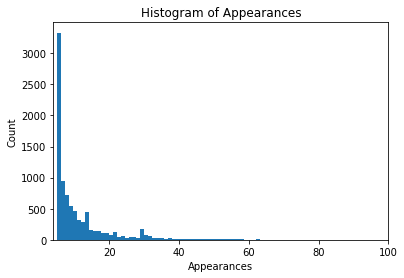

In [11]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,100)
plt.show()

Clearly, there's a massive spike at when the Appearances = 5. Let's see how it looks after zooming in a little...

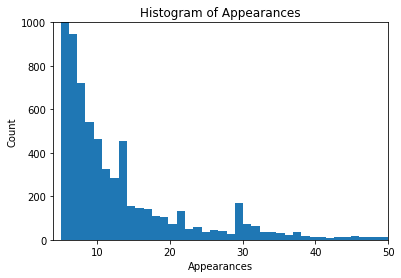

In [12]:
plt.hist(tracks['count'], bins=150)
plt.title('Histogram of Appearances')
plt.ylabel('Count')
plt.xlabel('Appearances')
plt.xlim(4,50)
plt.ylim(0,1000)
plt.show()

### Quarantine Tracks: Top 25% Deep Dive

This begs the question, are the top 25% songs appearing the most because of their relevance to quarantine or their overall popularity?

Before analyzing the audio features our data, let's seperate the songs into two groups:

 - The top 25% of songs (based on count) - a dataset of 2100 songs
 - The top 50 songs that appeared the most - a dataset of 50 songs
 
Subsequently, comparison to 2019 top 50s songs can be made.

In [13]:
quarantine_top_50 = tracks[tracks['count']>69]

In [14]:
top_25_percent = tracks[tracks['count']>13]

Starting with explicity, key, and mode, we get the following illustrations:

In [15]:
### PIE CHART ILLUSTRATIONS ARE BELOW

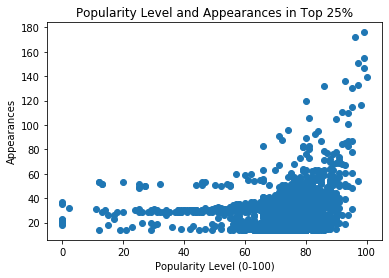

In [55]:
plt.scatter(top_25_percent['popularity'], top_25_percent['count'])
plt.title('Popularity Level and Appearances in Top 25%')
plt.xlabel('Popularity Level (0-100)')
plt.ylabel('Appearances')
plt.show()

Now that we've narrowed down our data set a little, let's see if we have stronger correlations between the two variables.

In [17]:
corr_compare(top_25_percent['popularity'], top_25_percent['count'])

Correlation: 0.138
Correlation of ranks: 0.1445
Spearman r: 0.1445


Popularity doesn't seem like the most indicative factor in a song's number of appearances. Let's try a different variable, like song year. Maybe the most played songs will be ones that are recently released and thus trending right now.

Spotify gives us the variable 'release date' as the full day, so we have to filter it down to the year. We did this by creating a new colummn called 'release_year'.

In [148]:
#pd.options.mode.chained_assignment = None

In [155]:
year_row = []
for x in range(len(tracks['release_date'])):
    year = int(tracks['release_date'][x][:4])
    year_row.append(year)
tracks['release_year'] = year_row

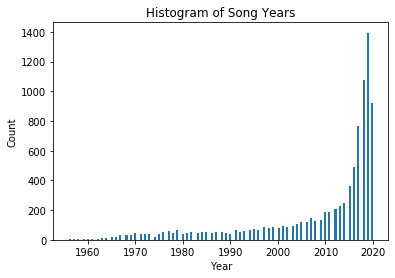

In [156]:
plt.hist(tracks['release_year'], bins=150)
plt.title('Histogram of Song Years')
plt.ylabel('Count')
plt.xlabel('Year')
plt.xticks()
plt.show()

As we can see, the songs are most commonly from the year 2019, but not 2020. This makes sense that most songs were from 2019, as since we are only a third of the way into the 2020, we can expect to have less songs from 2020. However, given the fact that we are only about a third (when this dataset was taken) into 2020, its interesting to note that the 2020 count is more than half as large as the 2019 count.

### Audio Analysis

In [130]:
def audio_features(dataset, feature, data_name):
    x = dataset[[feature]]
    y = dataset[['count']]
    
    model = LinearRegression().fit(x, y)
    m = float(model.coef_)
    b = float(model.intercept_)
    r2 = float(model.score(x, y))

    plt.scatter(x,y,marker = 'x', color = 'green')
    plt.plot(x, m*x + b)
    plt.title(data_name+feature)
    plt.xlabel(list(x)[0])
    plt.ylabel(list(y)[0])
    plt.show()
    
    model = LinearRegression().fit(x, y)
    r2 = float(model.score(x, y))

    print("Slope: ", round(float(model.coef_),4))
    print("Intercept: ", round(float(model.intercept_), 4))
    print("R-squared: ", round(r2, 4))
    print("")

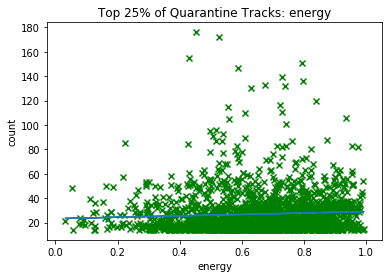

Slope:  5.7856
Intercept:  23.2215
R-squared:  0.0042

Correlation: 0.0645
Correlation of ranks: 0.1354
Spearman r: 0.1354


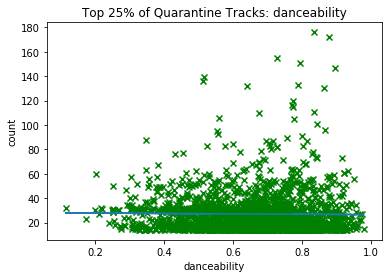

Slope:  -1.5495
Intercept:  28.062
R-squared:  0.0002

Correlation: -0.0145
Correlation of ranks: -0.0965
Spearman r: -0.0965


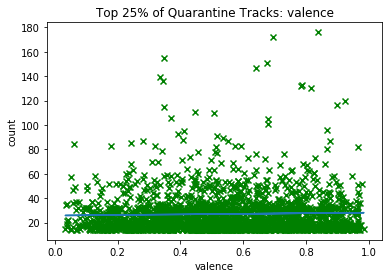

Slope:  2.3927
Intercept:  25.7532
R-squared:  0.0011

Correlation: 0.0338
Correlation of ranks: 0.0285
Spearman r: 0.0285


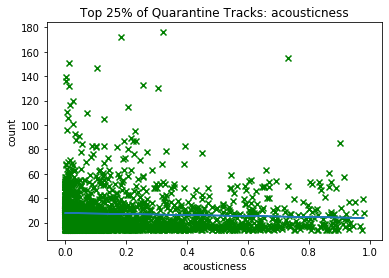

Slope:  -4.0617
Intercept:  27.8236
R-squared:  0.0033

Correlation: -0.0577
Correlation of ranks: -0.1257
Spearman r: -0.1257


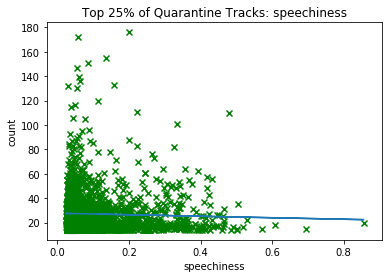

Slope:  -6.1507
Intercept:  27.6648
R-squared:  0.0014

Correlation: -0.0368
Correlation of ranks: -0.0722
Spearman r: -0.0722


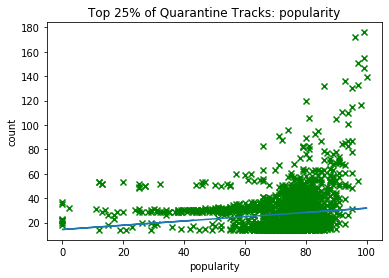

Slope:  0.1747
Intercept:  14.3278
R-squared:  0.0191

Correlation: 0.138
Correlation of ranks: 0.1445
Spearman r: 0.1445


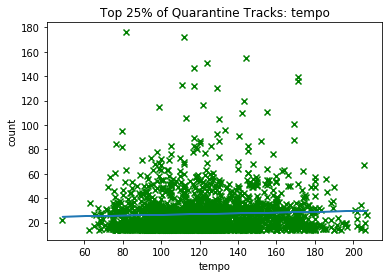

Slope:  0.0303
Intercept:  23.3463
R-squared:  0.0026

Correlation: 0.0507
Correlation of ranks: 0.0848
Spearman r: 0.0848


In [131]:
features = ['energy', 'danceability', 'valence', 'acousticness', 'speechiness', 'popularity', 'tempo']
for feat in features:
    audio_features(top_25_percent, feat, "Top 25% of Quarantine Tracks: ")
    corr_compare(top_25_percent[feat], top_25_percent['count'])

## Understanding our Top 2019 Tracks

In [132]:
tracks_2019 = pd.read_csv("final_top50_2019.csv")

In [23]:
print("As seen below, there are 50 songs in this data set with 23 variable columns used to describe each song.")
print("Shape: " +str(tracks_2019.shape))

As seen below, there are 50 songs in this data set with 23 variable columns used to describe each song.
Shape: (50, 24)


Like in the Quarantine Tracks dataset, each song is described through a series of categorical and numerical variables. Below are some summary statistics for the Top 2019 Tracks numerical variables.

To start, let's look at some characteristics of 2019's biggest hits.

In [133]:
print('Top 2019 Tracks Statistics')
summary_stats(tracks_2019)

Top 2019 Tracks Statistics


mean    median       var      std
energy          0.6046    0.6240    0.0288   0.1698
danceability    0.7194    0.7430    0.0170   0.1304
valence         0.4905    0.4950    0.0480   0.2191
acousticness    0.2994    0.2440    0.0652   0.2553
speechiness     0.1276    0.0814    0.0106   0.1030
popularity     81.4400   84.0000  108.0065  10.3926
tempo         120.4257  116.1255  826.0368  28.7409

Can we compare this in a side-by-side bar graph?

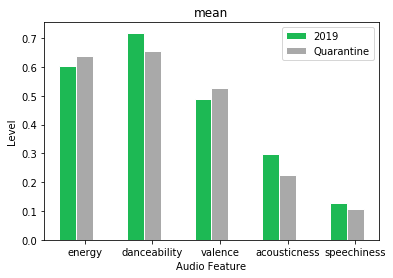

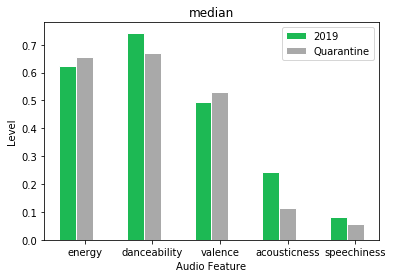

In [143]:
#only first four stats bc last two are on much larger scales
stats_2019 = summary_stats(tracks_2019)[:5]
stats_quarantine = summary_stats(tracks)[:5]

for stat in ['mean', 'median']:

    barWidth = 0.25

    bars1 = stats_2019[stat]
    bars2 = stats_quarantine[stat]

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
    plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')

    plt.xlabel('Audio Feature')
    plt.ylabel('Level')
    plt.title(stat)
    plt.xticks([r + barWidth for r in range(len(bars1))], features)

    plt.legend()
    plt.show()

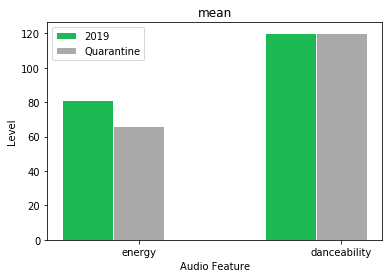

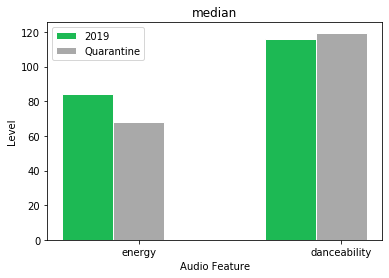

In [144]:
#last two stats
stats_2019 = summary_stats(tracks_2019)[5:]
stats_quarantine = summary_stats(tracks)[5:]

for stat in ['mean', 'median']:
    
    barWidth = 0.25

    bars1 = stats_2019[stat]
    bars2 = stats_quarantine[stat]

    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]

    plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
    plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')

    # Add xticks on the middle of the group bars
    plt.xlabel('Audio Feature')
    plt.ylabel('Level')
    plt.title(stat)
    plt.xticks([r + barWidth for r in range(len(bars1))], features)

    # Create legend & Show graphic
    plt.legend()
    plt.show()

## Comparing our Top 2019 Tracks and our Quarantine Tracks

### Categorical Variable 1: Explicitness

In [25]:
def pie_explicit(dataset, data_name):
    
    count = 0
    for i in dataset['explicit']:
        if i == True:
            count += 1
    percent_explicit = count/len(dataset['explicit'])
    
    explicit = round(percent_explicit*100, 4)
    clean = round((1-percent_explicit)*100, 4)
    
    labels = 'Explicit', 'Clean'
    fig1, ax1 = plt.subplots()
    
    ax1.pie([explicit, clean], 
            explode = (0, 0.1), 
            autopct='%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow=True, 
            startangle=90)

    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were explicit?")
    plt.show()
    
    #explicit_breakdown = {'explicit': explicit, 'clean': clean}
    explicit_breakdown = [explicit, clean]
    return explicit_breakdown

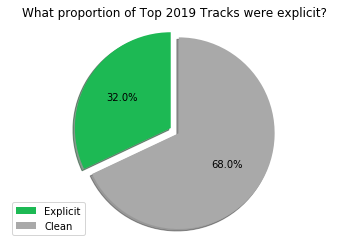

In [26]:
#2019 Tracks
explicit_2019 = pie_explicit(tracks_2019, 'Top 2019 Tracks')

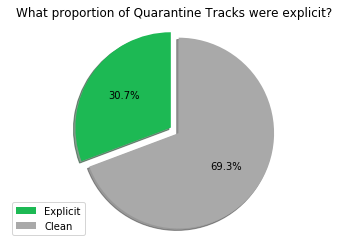

In [27]:
#Quarantine Tracks
explicit_quarantine = pie_explicit(tracks, "Quarantine Tracks")

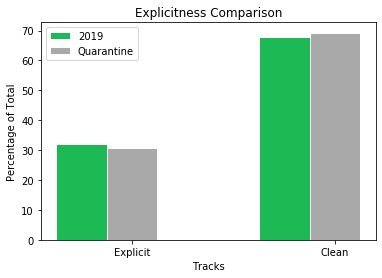

In [28]:
## We should eventually turn this into a function. But its past 11pm and I am too tired

# set width of bar
barWidth = 0.25
 
# set height of bar
data_2019 = explicit_2019
data_q = explicit_quarantine
 
bars1 = data_2019
bars2 = data_q

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
 
# Add xticks on the middle of the group bars
plt.xlabel('Tracks')
plt.ylabel('Percentage of Total')
plt.title("Explicitness Comparison")
plt.xticks([r + barWidth for r in range(len(bars1))], ['Explicit', 'Clean'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

## Categorical Variable 2: Key

How about what key the songs were in? The "Key" audio feature uses pitch class notation. For example, 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. Let's see how 2019, and the Quarantine tracks, turned out. 

In [29]:
def key_counter(dataset):

    count_0 = 0
    count_1 = 0
    count_2 = 0
    count_3 = 0
    count_4 = 0
    count_5 = 0
    count_6 = 0
    count_7 = 0
    count_8 = 0
    count_9 = 0
    count_10 = 0
    count_11 = 0

    for i in dataset['key']:
        if i == 1:
            count_0 += 1
        if i == 1:
            count_1 += 1
        if i == 2:
            count_2 += 1
        if i == 3:
            count_3 += 1
        if i == 4:
            count_4 += 1
        if i == 5:
            count_5 += 1
        if i == 6:
            count_6 += 1
        if i == 7:
            count_7 += 1
        if i == 8:
            count_8 += 1
        if i == 9:
            count_9 += 1
        if i == 10:
            count_10 += 1
        if i == 11:
            count_11 += 1
            
    key_counts = [count_0, count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8, count_9, count_10,count_11]
    
    key_percentage = []
    for count in key_counts:
        key_percentage.append((round(((count/len(dataset['key']))*100),4)))
    return key_percentage

In [30]:
tracks_keys_perc = key_counter(tracks)
print("key counts of Quarantine tracks: ")
print(tracks_keys_perc)
print("")

tracks_2019_keys_perc = key_counter(tracks_2019)
print("key counts of Top 2019 tracks: ")
print(tracks_2019_keys_perc)

key counts of Quarantine tracks: 
[12.2652, 12.2652, 9.1011, 2.4038, 7.2227, 8.5197, 7.7147, 10.1968, 7.0438, 8.8998, 6.5519, 8.5756]

key counts of Top 2019 tracks: 
[16.0, 16.0, 6.0, 0.0, 8.0, 16.0, 12.0, 8.0, 12.0, 4.0, 4.0, 8.0]


In [31]:
def key_pie(key_counts, data_name):
    
    labels = 'C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'
    fig1, ax1 = plt.subplots()

    ax1.pie(key_counts, 
            explode= (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
            colors = ["#FFD699", "#FFB266", "#FFFF99", "#CCFF99", "#99FFFF", "#9933FF", "#009999", "#99CCFF", "#FF99CC", "#FF0077", "#FFFF00", "#E0E0E0", "#999FF"], 
            autopct='%1.0f%%',
            shadow=True, 
            startangle=90)
    
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(labels, loc="best")
    plt.title("What proportion of " + data_name + " were which keys?")
    plt.show()

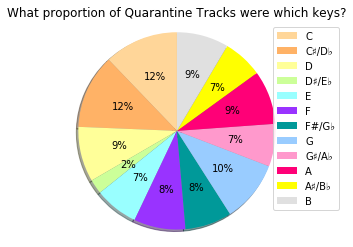

In [32]:
#Quarantine Tracks
key_pie(tracks_keys_perc, "Quarantine Tracks")

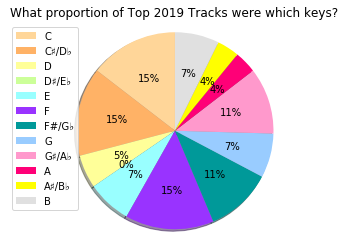

In [33]:
#2019 Tracks
key_pie(tracks_2019_keys_perc, "Top 2019 Tracks")

This pie chart illustrates a few things. First, the most popular Key's were C♯/D♭ and F, accounting for 8 of the 50 songs each.
Further, the only key not represented was D♯/E♭; all other 11 keys were represented. All this being said, the somewhat even distribution of the chart indicates that the key of a song does not have a <em> dramatic </em> effect on the song's success. Stay away from D# though...

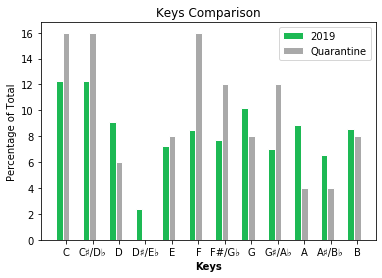

In [34]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = tracks_keys_perc
bars2 = tracks_2019_keys_perc
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
 
# Add xticks on the middle of the group bars
plt.title("Keys Comparison")
plt.xlabel('Keys', fontweight='bold')
plt.ylabel('Percentage of Total')
plt.xticks([r + barWidth for r in range(len(bars1))], ['C', 'C♯/D♭', 'D', 'D♯/E♭', 'E', 'F', 'F#/G♭', 'G', 'G♯/A♭', 'A', 'A♯/B♭', 'B'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

*** NEED TO COMMENT ON THE DIFFERENCES ***

More than key, songs have a modality associated with them. A song in a "major" key is more joyous while a "minor" key creates tension to be resolved. Let's take a look at the chart.

In [35]:
def mode_counter(dataset, data_name):
    print(data_name)
    #Major keys are denoted as 1, Minor keys denoted as 0
    #Could combine this function with pie chart function
    count_major = 0
    count_minor = 0
    for i in dataset['mode']:
        if i == 1:
            count_major += 1
        if i == 0:
            count_minor += 1
    
    print("count_major: ", count_major)
    print("count_minor: ", count_minor)
    
    percent_major = count_major/len(dataset['mode'])
    print('percent_major: ','{:.2%}'.format(percent_major))
    
    mode_breakdown = [count_major/len(dataset['mode']), count_minor/len(dataset['mode'])]
    
    return mode_breakdown

In [36]:
def modality_pie(breakdown, data_name):
    
    labels = 'Major', 'Minor'
    sizes = breakdown
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            explode = (0.1, 0),  
            autopct = '%1.1f%%', 
            colors = ['#1DB954', 'darkgrey'],
            shadow = True, 
            startangle=90)
    
    plt.legend(labels, loc="best")
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(data_name + ": Major or Minor?")
    plt.show()

Quarantine Tracks
count_major:  5576
count_minor:  3368
percent_major:  62.34%


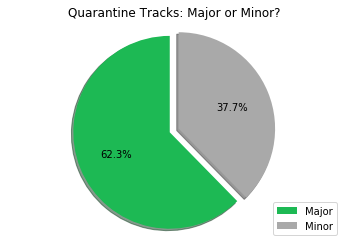

In [37]:
#Quarantine Tracks
modality_breakdown_quarantine = mode_counter(tracks, "Quarantine Tracks")
modality_pie(modality_breakdown_quarantine, "Quarantine Tracks")

Top 2019 Tracks
count_major:  29
count_minor:  21
percent_major:  58.00%


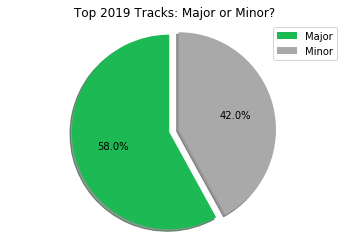

In [38]:
#2019 Tracks
modality_breakdown_2019 = mode_counter(tracks_2019, "Top 2019 Tracks")
modality_pie(modality_breakdown_2019, "Top 2019 Tracks")

Similar to key, not a huge disparity illustrated, but songs with a major mode were still made the top charts more often. 

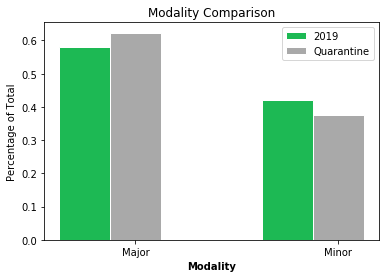

In [39]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = modality_breakdown_2019
bars2 = modality_breakdown_quarantine
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
 
# Add xticks on the middle of the group bars
plt.title("Modality Comparison")
plt.xlabel('Modality', fontweight='bold')
plt.ylabel('Percentage of Total')
plt.xticks([r + barWidth for r in range(len(bars1))], ["Major", "Minor"])
 
# Create legend & Show graphic
plt.legend()
plt.show()

### Categorical Variable 3: Year

When did these songs in the Top 2019 Tracks come out? 

In [160]:
year_row = []
for x in range(len(tracks_2019['release_date'])):
    year = int(tracks_2019['release_date'][x][:4])
    year_row.append(year)
tracks_2019['release_year'] = year_row

In [161]:
tracks_2019['release_year'].value_counts()

2019    35
2018    14
1975     1
Name: release_year, dtype: int64

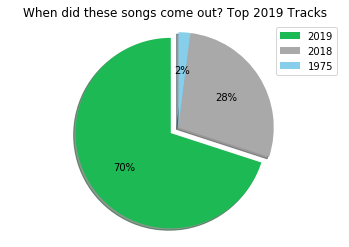

In [183]:
labels = '2019', '2018', '1975' #add a string to input? or make dict?
sizes = tracks_2019['release_year'].value_counts() #year_breakdown
explode = (0.1, 0, 0) 

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey', 'skyblue']
ax1.pie(sizes, explode=explode, autopct='%1.0f%%', colors = colors,
shadow=True, startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("When did these songs come out? Top 2019 Tracks")
plt.show()

### Comparing this to our Quarantine Songs

In [163]:
tracks['release_year'].value_counts()

2019    1394
2018    1075
2020     919
2017     767
2016     487
        ... 
1960       4
1961       4
1957       3
1958       3
1956       3
Name: release_year, Length: 65, dtype: int64

With a length of 65, that's a lot of years to look at, and they get very small quickly. Let's look just at the top 10 years.

In [180]:
year_df = pd.DataFrame(tracks['release_year'].value_counts()[:10])
year_list = list(year_df.index.values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


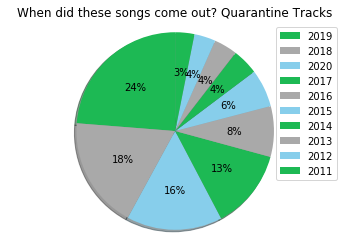

In [182]:
sizes = year_df #year_breakdown
labels = year_list

fig1, ax1 = plt.subplots()
colors = ['#1DB954', 'darkgrey', 'skyblue']
ax1.pie(sizes, 
        autopct='%1.0f%%', 
        colors = colors,
        shadow=True, 
        startangle=90)
plt.legend(labels, loc="best")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("When did these songs come out? Quarantine Tracks")
plt.show()

#not sure what this warning means

***NOTE TO ANDERS***

I spent some time trying to create a side-by-side barchat of the years...
Couldn't get it, but a way i could see it working is using the two dataframes of percentages below,
maybe merging them and then making the bar chart that way..
theres a specific way to do it with dataframes which i commmented out below.

once you figure out how to put zeros in the years where there are no 2019 tracks, then it should be pretty easy to make the bar chart by just accessing the two colummns

and you'll see i made a list of all the years, useful for the labels/tick marks (i only did like the top 10 bc there are so many) 

In [220]:
print("Quarantine Tracks")
year_df_quarantine = pd.DataFrame(tracks['release_year'].value_counts()[:10])
year_list_quarantine = list(year_df_quarantine.index.values)
year_percents_q = (year_df_quarantine/(tracks['release_year'].value_counts().sum()))
print(year_percents_q)

Quarantine Tracks
      release_year
2019      0.155859
2018      0.120192
2020      0.102750
2017      0.085756
2016      0.054450
2015      0.040698
2014      0.027952
2013      0.025157
2012      0.023032
2011      0.020572


In [217]:
print("Top 2019 Tracks")
year_df_2019 = pd.DataFrame(tracks_2019['release_year'].value_counts()[:10])
year_list_2019 = list(year_df_2019.index.values)
year_percents_2019 = (year_df_2019/year_df_2019.sum())
print(year_percents_2019)

Top 2019 Tracks
      release_year
2019          0.70
2018          0.28
1975          0.02


In [208]:
yers = []
for i in range(1975,2020):
    yers.append(i)
print(yers)

[1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [210]:
# Trying to do side-by-side bar graphs
# df = pd.DataFrame({'2019': year_percents_2019,
#                    'quarantine': year_percents_q}, index=yers)
# ax = df.plot.bar(rot=0)

In [214]:
# # set width of bar
# barWidth = 0.25
 
# # set height of bar
# bars1 = year_percents_2019
# bars2 = year_percents_q
 
# # Set position of bar on X axis
# r1 = np.arange(len(bars1))
# r2 = [x + barWidth for x in r1]
 
# # Make the plot
# plt.bar(r1, bars1, color='#1DB954', width=barWidth, edgecolor='white', label='2019')
# plt.bar(r2, bars2, color='darkgrey', width=barWidth, edgecolor='white', label='Quarantine')
 
# # Add xticks on the middle of the group bars
# plt.title("Title")
# plt.xlabel('X-Label', fontweight='bold')
# plt.ylabel('Y-Label')
# plt.xticks([r + barWidth for r in range(len(bars1))], yers)
 
# # Create legend & Show graphic
# plt.legend()
# plt.show()

As one might expect, Release year plays a large role on a songs popularity. Only 30% of the top 50 songs splilled over from the year before. One might be wondering, what song from 1975 is still crushing the top charts? A remastering of "Bohemian Rhapsody" by the British rock band Queen. 

## Numerical Variables

Now let's analyze some other specific columns in detail, quantifying and illustrating the trends. Three quantifiable audio features that are easy ot compare are Energy, Danceability and Valence. Spotify measures each on a scale of 0.0 to 1.0, so they can be graphed alongside eachother without manipulating scale. 

According to Spotify's WEB API reference guide the Energy of a song "represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy." 

Likewise, a song's danceability "describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity."

Finally, a song's valence score is "describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

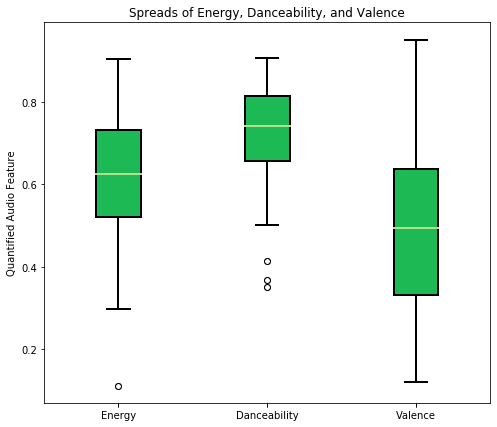

In [43]:
data_to_plot = tracks_2019['energy'], tracks_2019['danceability'], tracks_2019['valence']

# Create a figure instance
fig = plt.figure(1, figsize=(8, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='black', linewidth=2)
    # change fill color
    box.set( facecolor = '#1DB954' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['Energy', 'Danceability', 'Valence'])

    
plt.title("Spreads of Energy, Danceability, and Valence")
plt.ylabel("Quantified Audio Feature")
plt.show()

How about instruments and vocals? Two good measures of these characteristics are <em> acousticness</em>  and <em> speechiness.</em> <br>

According to Spotify's WEB API reference table, speechiness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic (where 1.0 indicates a certainty that the track is accoustic). 

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. For instance, values above 0.66 describe tracks that are probably made entirely of spoken words, like rap music. 

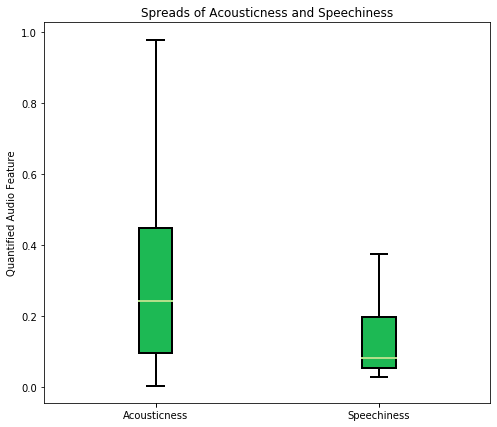

In [44]:
data_to_plot = tracks_2019['acousticness'], tracks_2019['speechiness']

fig = plt.figure(1, figsize=(8, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)
bp = ax.boxplot(data_to_plot, patch_artist=True)

for box in bp['boxes']:
    box.set( color='black', linewidth=2)
    box.set( facecolor = '#1DB954' )

for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_xticklabels(['Acousticness', 'Speechiness'])
plt.title("Spreads of Acousticness and Speechiness")
plt.ylabel("Quantified Audio Feature")
plt.show()

Finally, we can look at a song's tempo. In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. It is measured in beats per minute (BPM). 

In [45]:
# Potentially, realign all scales of all audio features to lineup. 

Let's break down each of these audio features individually to get exact summary statistics.

***NOTE: Since there are no counts in this section, i can't run correlations, intercept, rank, rsqaure ect. on these values.***

However, the biggest comparison is literally the median of each vs the median in quarantine. 

## Box Plot Comparisons: Quarantine vs. 2019

***NEED EXPLANATIONS AND DESCRIPTIONS***

In [46]:
def box_plot_comparisons(feature):
    x = quarantine_top_50[feature]
    y = tracks_2019[feature]
    
    data_to_plot = x, y
    fig = plt.figure(1, figsize=(8, 7))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    bp = ax.boxplot(data_to_plot, patch_artist=True)
    
    for box in bp['boxes']:
        box.set( color='black', linewidth=2)
        box.set( facecolor = '#1DB954' )
    
    for whisker in bp['whiskers']:
        whisker.set(color='black', linewidth=2)
    
    for cap in bp['caps']:
        cap.set(color='black', linewidth=2)
    
    for median in bp['medians']:
        median.set(color='#b2df8a', linewidth=2)
    
    for flier in bp['fliers']:
        flier.set(marker='o', color='#e7298a', alpha=0.5)
    
    ax.set_xticklabels(['Quarantine top 50', '2019 Top 50'])
    plt.title(feature + ": Quarantine vs. 2019")
    plt.ylabel("Scale")
    plt.show()

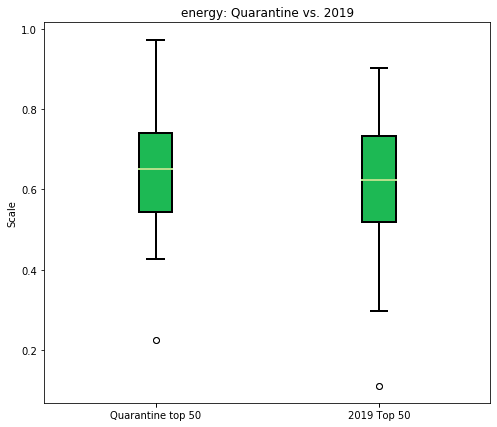

In [47]:
box_plot_comparisons('energy')

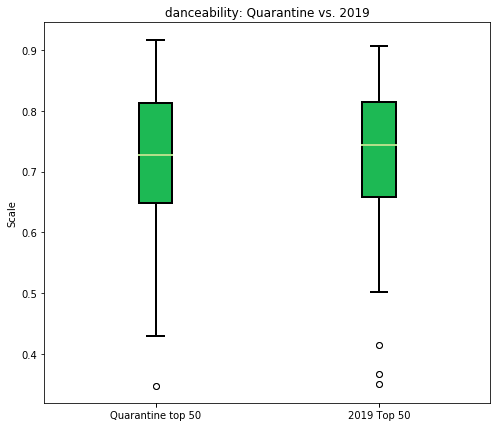

In [48]:
box_plot_comparisons('danceability')

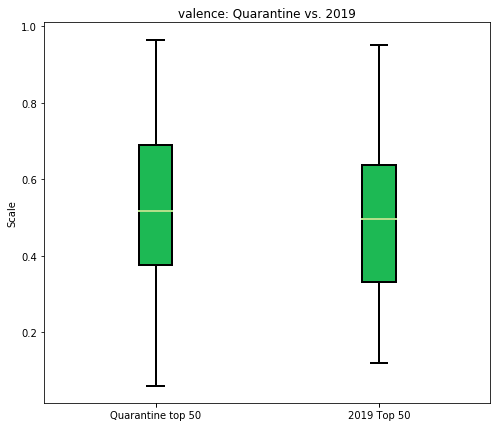

In [49]:
box_plot_comparisons('valence')

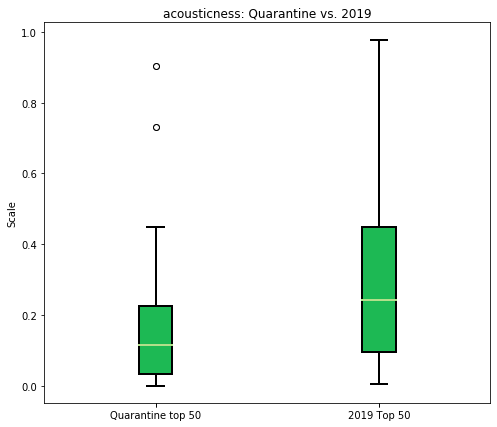

In [50]:
box_plot_comparisons('acousticness')

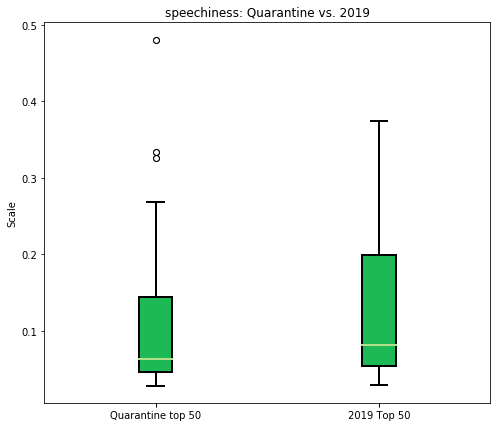

In [51]:
box_plot_comparisons('speechiness')

## Using the Binomial Distribution to Understand Our Data

We want to see if the songs of 2019 are in our quarantine songs. Maybe, that can show us that we are remaining some amount of similarity and sanity during our isolation. 

In this case, a "success" is the appearance of a 2019 song in our quarantine song dataset. We had 103 successes out of 8944, which is a probability of 0.0115161. So, the probability of success (of a top 2019 song appearing in our quarantine songs) is 0.0115161.

In [52]:
# top2019songs = tracks_2019['name']
# topQsongs = tracks['name']

# count = 0
# for song in top2019songs:
#     for i in range(len(topQsongs)):
#         if song in topQsongs[i]:
#             count+=1
            
# print("number of times the top 2019 songs appear in our quarantine songs dataset:", count)
# print("total quarantine songs: ", len(topQsongs))
# print(round(count/len(topQsongs),8))

In [53]:
# from scipy.special import factorial, comb

# def binomial(n, p, k):
#     return comb(n, k) * (p**k) * (1-p)**(n-k)

# def binomialsampling(n, p, k):
#     count = 0
#     for x in np.random.binomial(n, p, 10000):
#         if x > k:
#             count += 1
#     return count/10000

In [54]:
# print("What is the probability at least one song appears in the Quarantine songs?")
# print("")
# print("P(at least one) = 1 - P(none)")


# n = 100
# p = 0.0115161
# k = 0
# print("n =", n)
# print("")


# print("using distribution: ", 1-binomial(n, p, k))
# print("using sampling: ", binomialsampling(n, p, k))